# Project Clarify ML
## Train / deploy / query demo

A walkthrough of model training (which includes export on completion), serving, query of the served model, and hyperparameter tuning with Katib; a synopsis of work done in Q1.

## Setup

In [1]:

import tensorflow as tf

tfe = tf.contrib.eager
tfe.enable_eager_execution()
Modes = tf.estimator.ModeKeys  # pylint: disable=invalid-name    



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Train

First we'll configure and launch a TFJob to train our model on Kubeflow using TPUs with the following call to `configure_experiment`.

In [3]:

from pcml.launcher.experiment import configure_experiment

experiment = configure_experiment(
  base_name="test_e2e_tpu_ut",
  problem="multi_modal_imaging_multi_problem",
  model="multi_modal_model_ut",
  hparams_set="multi_modal_model_tiny_v2",
  num_train_steps=300,
  num_gpu_per_worker=0,
  trainer_memory="7Gi",
  trainer_cpu=4,
  extra_hparams={"batch_size": 32},
  app_root="/home/jovyan/work/pcml",
  base_image="tensorflow/tensorflow:1.13.1-py3",
  schedule="train",
  data_dir="gs://clarify-models-us-central1/experiments/example-scaleup",
  remote_base="gs://clarify-models-us-central1/experiments/example-scaleup",
  use_tpu=True,
  num_tpu_cores=8,
  tpu_tf_version="1.13",
  selector_labels={"type": "tpu-host"})

create_response, job_dict = experiment.batch_run()


In [2]:

# TODO: Make it way easier to look up the ckpt dir

#experiment.spec["tfReplicaSpecs"]["MASTER"]["template"]["spec"]["containers"][0].args

ckpt_dir = "gs://clarify-models-us-central1/experiments/example-scaleup/test-e2e-tpu-ut-j0325-1554-d40c/output"


## Serve

In [33]:

import os
from pcml.serving_utils import serve_model

serve_model(ks_path="/home/jovyan/work/pcml/clarify/ks",
            model_name="multi_modal_model_ut",
            model_export_path=os.path.join(ckpt_dir, "export"),
            kf_app_path="/home/jovyan/work/pcml/clarify/v0.4.1/clarify/ks_app/")


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-service multi-modal-model-ut-service-d110


I0325 16:22:02.235029 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-service multi-modal-model-ut-service-d110


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-d110 modelName multi-modal-model-ut


I0325 16:22:02.795305 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-d110 modelName multi-modal-model-ut


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-d110 trafficRule v1:100


I0325 16:22:02.996902 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-d110 trafficRule v1:100


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-d110 serviceType ClusterIP


I0325 16:22:03.129825 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-d110 serviceType ClusterIP


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-deployment-gcp multi-modal-model-ut-d110


I0325 16:22:03.257907 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-deployment-gcp multi-modal-model-ut-d110


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 modelName multi-modal-model-ut


I0325 16:22:03.407409 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 modelName multi-modal-model-ut


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 versionName v1


I0325 16:22:03.561015 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 versionName v1


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 modelBasePath gs://clarify-models-us-central1/experiments/example-scaleup/test-e2e-tpu-ut-j0325-1554-d40c/output/export


I0325 16:22:03.679179 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 modelBasePath gs://clarify-models-us-central1/experiments/example-scaleup/test-e2e-tpu-ut-j0325-1554-d40c/output/export


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 gcpCredentialSecretName user-gcp-sa


I0325 16:22:03.800369 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 gcpCredentialSecretName user-gcp-sa


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 injectIstio true


I0325 16:22:03.922029 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-d110 injectIstio true


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks env set default


I0325 16:22:04.054376 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks env set default


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-service-d110


I0325 16:22:04.169717 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-service-d110


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-d110


I0325 16:22:14.068187 140472469419840 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-d110


In [35]:
!kubectl get pods | grep multi-modal-model-ut

multi-modal-model-ut-d110-6cd459ddb6-9ljv4                1/1       Running     0          19s


## Query

#### Proxy

In [2]:
# For now I don't have IAP working so we need to proxy the served port of the
# remote machine to localhost in order to be able to make a query i.e.
#!kubectl port-forward multi-modal-model-ut-d110-6cd459ddb6-9ljv4 9000:9000
# Needs to be run some other way, ! can't be used to launch a bg process

In [3]:
server = "localhost:9000"

#### Construct a dummy query

In [4]:

from pcml.data_generators import mmimp


INFO:tensorflow:Entry Point [tensor2tensor.envs.tic_tac_toe_env:TicTacToeEnv] registered with id [T2TEnv-TicTacToeEnv-v0]


In [16]:

template = mmimp.MultiModalImagingExampleSpec(
        video_shape=(4,224,224,3), # HACK - it expects full videos and to these applies the down-sampler, should store 64x64 videos on disk
        image_shape=(64,64,3),
        audio_shape=(1926,),
        eeg_shape=(32*100,), # HACK
        target_shape=(12,),
    )
    
video = tf.reshape(template.fields["video"].mock_one(), (4*224*224*3,))
image = tf.reshape(template.fields["image"].mock_one(zeros=True), (64*64*3,))
eeg = tf.reshape(template.fields["eeg"].mock_one(zeros=True), (3200,))

ex = tf.train.Example(features=tf.train.Features(feature={
  "audio": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 1926)),
  "video": tf.train.Feature(int64_list=tf.train.Int64List(value=video)),
  "image": tf.train.Feature(int64_list=tf.train.Int64List(value=image)),
  "eeg": tf.train.Feature(int64_list=tf.train.Int64List(value=eeg)),
  "problem_code": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 1)),
  "targets": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 12))
}))


### Perform the query

In [39]:

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc
from tensor2tensor.serving import serving_utils

def _make_grpc_request(examples, server_stub, servable_name, timeout_secs=5):

  request = predict_pb2.PredictRequest()
  request.model_spec.name = servable_name
  request.inputs["input"].CopyFrom(
    tf.make_tensor_proto(
            [ex.SerializeToString() for ex in examples], shape=[len(examples)]))
  response = stub.Predict(request, timeout_secs)
  outputs = tf.make_ndarray(response.outputs["outputs"])

  return [{
    "outputs": outputs[i]
  } for i in range(len(outputs))]


stub = serving_utils._create_stub(server)

servable_name = "multi-modal-model-ut"

response = _make_grpc_request(examples=[ex],
                              server_stub=stub,
                              servable_name=servable_name)

response[0]["outputs"]


array([[ 79.4701   ],
       [ 80.600525 ],
       [ 79.44701  ],
       [ 77.51228  ],
       [ 75.431694 ],
       [ 77.470314 ],
       [ 89.360115 ],
       [115.9096   ],
       [122.36474  ],
       [ 89.798416 ],
       [ -0.8570216],
       [ -5.267337 ]], dtype=float32)

### Local query

Obtain an example from a tf.data dataset then feed that to a locally-served model.

#### Generate, examine example

In [11]:
from pcml.dev_helper import T2TDevHelper

In [12]:

helper = T2TDevHelper("multi_modal_dev_model",
                      "image_celeba_pcml_dev",
                      "multi_modal_dev_model_tiny",
                      None,
                      "/tmp/celeba")

helper.datagen()


INFO:tensorflow:Downloading https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=uvSR to /tmp/tmphxbb2rfh/img_align_celeba.zip


I0325 20:02:55.964800 139663710463808 generator_utils.py:283] Downloading https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=uvSR to /tmp/tmphxbb2rfh/img_align_celeba.zip



INFO:tensorflow:Successfully downloaded img_align_celeba.zip, 1443490838 bytes.


I0325 20:03:08.233234 139663710463808 generator_utils.py:297] Successfully downloaded img_align_celeba.zip, 1443490838 bytes.


INFO:tensorflow:Downloading https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pd0FJY3Blby1HUTQ to /tmp/tmphxbb2rfh/celeba_landmarks_align


I0325 20:03:09.263184 139663710463808 generator_utils.py:283] Downloading https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pd0FJY3Blby1HUTQ to /tmp/tmphxbb2rfh/celeba_landmarks_align



INFO:tensorflow:Successfully downloaded celeba_landmarks_align, 12156055 bytes.


I0325 20:03:10.066515 139663710463808 generator_utils.py:297] Successfully downloaded celeba_landmarks_align, 12156055 bytes.


INFO:tensorflow:Downloading https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pblRyaVFSWGxPY0U to /tmp/tmphxbb2rfh/celeba_attr


I0325 20:03:11.436172 139663710463808 generator_utils.py:283] Downloading https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pblRyaVFSWGxPY0U to /tmp/tmphxbb2rfh/celeba_attr



INFO:tensorflow:Successfully downloaded celeba_attr, 26721026 bytes.


I0325 20:03:13.570899 139663710463808 generator_utils.py:297] Successfully downloaded celeba_attr, 26721026 bytes.


INFO:tensorflow:Generating case 0.


I0325 20:04:05.271942 139663710463808 generator_utils.py:170] Generating case 0.


INFO:tensorflow:Generated 100 Examples


I0325 20:04:05.497076 139663710463808 generator_utils.py:193] Generated 100 Examples


INFO:tensorflow:Not downloading, file already found: /tmp/tmphxbb2rfh/img_align_celeba.zip


I0325 20:04:05.505115 139663710463808 generator_utils.py:268] Not downloading, file already found: /tmp/tmphxbb2rfh/img_align_celeba.zip


INFO:tensorflow:Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_landmarks_align


I0325 20:04:05.509054 139663710463808 generator_utils.py:268] Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_landmarks_align


INFO:tensorflow:Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_attr


I0325 20:04:05.511838 139663710463808 generator_utils.py:268] Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_attr


INFO:tensorflow:Generating case 0.


I0325 20:04:11.514564 139663710463808 generator_utils.py:170] Generating case 0.


INFO:tensorflow:Generated 100 Examples


I0325 20:04:11.718241 139663710463808 generator_utils.py:193] Generated 100 Examples


INFO:tensorflow:Not downloading, file already found: /tmp/tmphxbb2rfh/img_align_celeba.zip


I0325 20:04:11.722695 139663710463808 generator_utils.py:268] Not downloading, file already found: /tmp/tmphxbb2rfh/img_align_celeba.zip


INFO:tensorflow:Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_landmarks_align


I0325 20:04:11.724748 139663710463808 generator_utils.py:268] Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_landmarks_align


INFO:tensorflow:Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_attr


I0325 20:04:11.726420 139663710463808 generator_utils.py:268] Not downloading, file already found: /tmp/tmphxbb2rfh/celeba_attr


INFO:tensorflow:Generating case 0.


I0325 20:04:18.062736 139663710463808 generator_utils.py:170] Generating case 0.


INFO:tensorflow:Generated 100 Examples


I0325 20:04:18.210750 139663710463808 generator_utils.py:193] Generated 100 Examples


INFO:tensorflow:Shuffling data...


I0325 20:04:18.215800 139663710463808 generator_utils.py:527] Shuffling data...


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0325 20:04:18.217613 139663710463808 deprecation.py:323] From /home/jovyan/.local/lib/python3.6/site-packages/tensor2tensor/data_generators/generator_utils.py:469: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


INFO:tensorflow:Data shuffled.


I0325 20:04:19.214002 139663710463808 generator_utils.py:530] Data shuffled.


In [127]:
ex = helper.eager_get_example()

In [9]:

def _get_and_show_example():
    ex = helper.eager_get_example()
    img = ex["image"].numpy()[0]
    labels = ex["targets"][0].numpy()
    plot_overlay(img, labels)
    return ex, img, labels

def plot_overlay(image, labels):
    
    def _update_y(y):
      return (y)*64/218

    def _update_x(x):
      return (x)*64/178

    lefteye_x = _update_x(labels[0])
    lefteye_y = _update_y(labels[1])
    righteye_x = _update_x(labels[2])
    righteye_y = _update_y(labels[3])
    nose_x = _update_x(labels[4])
    nose_y = _update_y(labels[5])
    leftmouth_x = _update_x(labels[6])
    leftmouth_y = _update_y(labels[7])
    rightmouth_x = _update_x(labels[8])
    rightmouth_y = _update_y(labels[9])

    plt.scatter([lefteye_x, righteye_x, nose_x, leftmouth_x, rightmouth_x],
                [lefteye_y, righteye_y, nose_y, leftmouth_y, rightmouth_y])
    plt.xlim(0,64)
    plt.ylim(64,0)
    plt.imshow(image)
    plt.show()


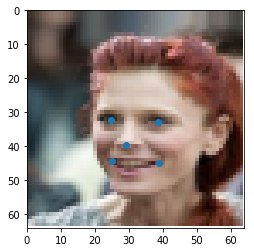

In [238]:
_, _, _ = _get_and_show_example()

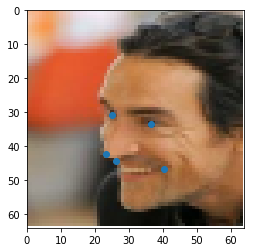

In [242]:
_, _, _ = _get_and_show_example()

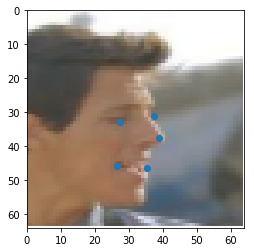

In [246]:
_, _, _ = _get_and_show_example()

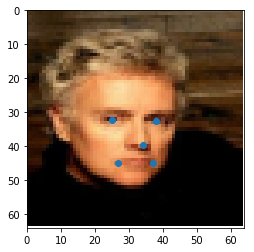

In [276]:
ex, img, labels = _get_and_show_example()

In [277]:
image = tf.reshape(ex["image"][0], (64*64*3,))

In [278]:

ex = tf.train.Example(features=tf.train.Features(feature={
  "audio": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 1926)),
  "video": tf.train.Feature(int64_list=tf.train.Int64List(value=video)),
  "image": tf.train.Feature(int64_list=tf.train.Int64List(value=image)),
  "eeg": tf.train.Feature(int64_list=tf.train.Int64List(value=eeg)),
  "problem_code": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 1)),
  "targets": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 12))
}))


In [279]:

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc
from tensor2tensor.serving import serving_utils

def _make_grpc_request(examples, server_stub, servable_name, timeout_secs=5):

  request = predict_pb2.PredictRequest()
  request.model_spec.name = servable_name
  request.inputs["input"].CopyFrom(
    tf.make_tensor_proto(
            [ex.SerializeToString() for ex in examples], shape=[len(examples)]))
  response = stub.Predict(request, timeout_secs)
  outputs = tf.make_ndarray(response.outputs["outputs"])

  return [{
    "outputs": outputs[i]
  } for i in range(len(outputs))]


stub = serving_utils._create_stub(server)

servable_name = "multi-modal-model-ut"

response = _make_grpc_request(examples=[ex],
                              server_stub=stub,
                              servable_name=servable_name)

response[0]["outputs"]


array([[ 78.23723  ],
       [ 79.40712  ],
       [ 78.42296  ],
       [ 76.841125 ],
       [ 75.04834  ],
       [ 76.909515 ],
       [ 88.13536  ],
       [113.35998  ],
       [118.92284  ],
       [ 83.472496 ],
       [ -2.5511527],
       [ -6.1147394]], dtype=float32)

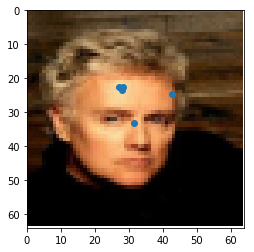

In [290]:
plot_overlay(img, response[0]["outputs"])

Clearly these landmark predictions are wrong which is to be expected because we only trained our model for 300 steps.

### Long training run

So then let's train a model for much more than 300 steps and see how well it performs.

In [1]:

from pcml.launcher.experiment import configure_experiment

# See <---- (letter) below
# a: Training steps increased from 300 to 6000
# b: Batch size increased from 36 to 48

experiment = configure_experiment(
  base_name="test_e2e_tpu_ut",
  problem="multi_modal_imaging_multi_problem",
  model="multi_modal_model_ut",
  hparams_set="multi_modal_model_tiny_v2",
  num_train_steps=6000, # <---- a
  num_gpu_per_worker=0,
  trainer_memory="7Gi",
  trainer_cpu=4,
  extra_hparams={"batch_size": 48}, # <---- b
  app_root="/home/jovyan/work/pcml",
  base_image="tensorflow/tensorflow:1.13.1-py3",
  schedule="train",
  data_dir="gs://clarify-models-us-central1/experiments/example-scaleup",
  remote_base="gs://clarify-models-us-central1/experiments/example-scaleup",
  use_tpu=True,
  num_tpu_cores=8,
  tpu_tf_version="1.13",
  selector_labels={"type": "tpu-host"})

create_response, job_dict = experiment.batch_run()

# What we would like to see here is the ability to over-fit to a small training dataset as a
# confirmation our model is functioning at least in this sense.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Entry Point [tensor2tensor.envs.tic_tac_toe_env:TicTacToeEnv] registered with id [T2TEnv-TicTacToeEnv-v0]


In [5]:
create_response

{'apiVersion': 'kubeflow.org/v1beta1',
 'kind': 'TFJob',
 'metadata': {'creationTimestamp': '2019-03-25T18:46:06Z',
  'generation': 1,
  'name': 'test-e2e-tpu-ut-j0325-1846-c625',
  'namespace': 'kubeflow',
  'resourceVersion': '9188476',
  'selfLink': '/apis/kubeflow.org/v1beta1/namespaces/kubeflow/tfjobs/test-e2e-tpu-ut-j0325-1846-c625',
  'uid': '3fce5e09-4f2e-11e9-af6e-42010a8000a2'},
 'spec': {'tfReplicaSpecs': {'MASTER': {'replicas': 1,
    'template': {'metadata': {'annotations': {'tf-version.cloud-tpus.google.com': '1.13'}},
     'spec': {'containers': [{'args': ['unset TF_CONFIG; apt-get update && apt-get install -y libsm6 libxext6 libxrender-dev libglib2.0-0; python -c \'import tensorflow as tf; tf.gfile.Copy("gs://clarify-models-us-central1/experiments/example-scaleup/test-e2e-tpu-ut-j0325-1846-c625/pcml-0.0.1.tar.gz", "/tmp/pcml-0.0.1.tar.gz", overwrite=True)\'; cd /tmp; tar -xzvf /tmp/pcml-0.0.1.tar.gz; cd /tmp/pcml-0.0.1; pip install -e .; python -c \'import tensorflow as

In [6]:

import os
from pcml.serving_utils import serve_model

ckpt_dir = "gs://clarify-models-us-central1/experiments/example-scaleup/test-e2e-tpu-ut-j0325-1846-c625/output"

serve_model(ks_path="/home/jovyan/work/pcml/clarify/ks",
            model_name="multi_modal_model_ut",
            model_export_path=os.path.join(ckpt_dir, "export"),
            kf_app_path="/home/jovyan/work/pcml/clarify/v0.4.1/clarify/ks_app/")


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-service multi-modal-model-ut-service-edd9


I0325 20:00:37.017306 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-service multi-modal-model-ut-service-edd9


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-edd9 modelName multi-modal-model-ut


I0325 20:00:37.177944 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-edd9 modelName multi-modal-model-ut


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-edd9 trafficRule v1:100


I0325 20:00:37.314347 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-edd9 trafficRule v1:100


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-edd9 serviceType ClusterIP


I0325 20:00:37.455038 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-service-edd9 serviceType ClusterIP


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-deployment-gcp multi-modal-model-ut-edd9


I0325 20:00:37.580106 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks generate tf-serving-deployment-gcp multi-modal-model-ut-edd9


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 modelName multi-modal-model-ut


I0325 20:00:37.731470 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 modelName multi-modal-model-ut


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 versionName v1


I0325 20:00:37.851890 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 versionName v1


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 modelBasePath gs://clarify-models-us-central1/experiments/example-scaleup/test-e2e-tpu-ut-j0325-1846-c625/output/export


I0325 20:00:38.010829 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 modelBasePath gs://clarify-models-us-central1/experiments/example-scaleup/test-e2e-tpu-ut-j0325-1846-c625/output/export


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 gcpCredentialSecretName user-gcp-sa


I0325 20:00:38.130631 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 gcpCredentialSecretName user-gcp-sa


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 injectIstio true


I0325 20:00:38.259261 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks param set multi-modal-model-ut-edd9 injectIstio true


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks env set default


I0325 20:00:38.378018 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks env set default


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-service-edd9


I0325 20:00:38.493971 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-service-edd9


INFO:tensorflow:Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-edd9


I0325 20:00:48.349515 139663710463808 serving_utils.py:51] Calling command: /home/jovyan/work/pcml/clarify/ks apply default -c multi-modal-model-ut-edd9


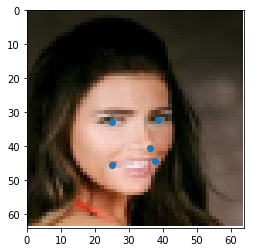

In [20]:
ex, img, labels = _get_and_show_example()

In [21]:

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc
from tensor2tensor.serving import serving_utils
from pcml.data_generators import mmimp


def _make_grpc_request(examples, server_stub, servable_name, timeout_secs=5):

  request = predict_pb2.PredictRequest()
  request.model_spec.name = servable_name
  request.inputs["input"].CopyFrom(
    tf.make_tensor_proto(
            [ex.SerializeToString() for ex in examples], shape=[len(examples)]))
  response = stub.Predict(request, timeout_secs)
  outputs = tf.make_ndarray(response.outputs["outputs"])

  return [{
    "outputs": outputs[i]
  } for i in range(len(outputs))]

# After starting proxy of serving pod 9000 to localhost:9000 from command line
server = "localhost:9000"

template = mmimp.MultiModalImagingExampleSpec(
        video_shape=(4,224,224,3), # HACK - it expects full videos and to these applies the down-sampler, should store 64x64 videos on disk
        image_shape=(64,64,3),
        audio_shape=(1926,),
        eeg_shape=(32*100,), # HACK
        target_shape=(12,),
    )

video = tf.reshape(template.fields["video"].mock_one(), (4*224*224*3,))
eeg = tf.reshape(template.fields["eeg"].mock_one(zeros=True), (3200,))

image = tf.reshape(ex["image"][0], (64*64*3,))

query_example = tf.train.Example(features=tf.train.Features(feature={
    "audio": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 1926)),
    "video": tf.train.Feature(int64_list=tf.train.Int64List(value=video)),
    "image": tf.train.Feature(int64_list=tf.train.Int64List(value=image)),
    "eeg": tf.train.Feature(int64_list=tf.train.Int64List(value=eeg)),
    "problem_code": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 1)),
    "targets": tf.train.Feature(int64_list=tf.train.Int64List(value=[0] * 12))
}))

stub = serving_utils._create_stub(server)

servable_name = "multi-modal-model-ut"

response = _make_grpc_request(examples=[query_example],
                              server_stub=stub,
                              servable_name=servable_name)

response[0]["outputs"]


array([[ 78.94051  ],
       [ 80.04538  ],
       [ 78.89234  ],
       [ 77.27198  ],
       [ 75.382866 ],
       [ 76.92707  ],
       [ 87.81217  ],
       [113.26525  ],
       [118.94756  ],
       [ 90.979034 ],
       [ -2.5690925],
       [ -6.530515 ]], dtype=float32)

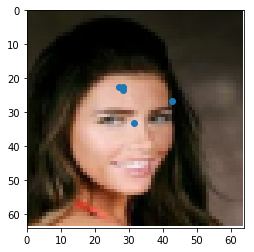

In [24]:
# Hmm that looks really similar to the predictions for the query shown above with the model
# we trained for only 300 steps
plot_overlay(img, response[0]["outputs"])

_ ="""
array([[ 78.23723  ],
       [ 79.40712  ],
       [ 78.42296  ],
       [ 76.841125 ],
       [ 75.04834  ],
       [ 76.909515 ],
       [ 88.13536  ],
       [113.35998  ],
       [118.92284  ],
       [ 83.472496 ],
       [ -2.5511527],
       [ -6.1147394]], dtype=float32)
"""
# It's possible there's an error with the parsing and/or viz of the landmark coordinates.
# Or a jupyter notebook variable re-use side-effect. Or maybe it just doesn't
# work well yet.

Update: One reason for this could be that the deployment of the new (longer-trained) model was not proxied to localhost before the second query was made (i.e. the old model was used).

### TPU speed-up

The first figure below shows TPU runs (green, blue, grey) running at many-fold greater steps/second than equivalent runs on a K80 GPU with key differentiations being batch size and the source of training examples (local SSD or GCS). TPU runs with batch size of 36 and which pulled examples from GCS are directly comparable. Such a TPU run in this condition is shown in green (top) and a comparable GPU run in red and grey (very bottom), between the two showing about a 6x speed up in training steps/second.

<img src="tboard-one.png">

### Convergence on small dataset

Convergence on a small dataset.

<img src="tboard-three.png">

## Datagen for large number of examples, highmem node

One easy explanation for why the above did not yeild a model that performed well qualitatively was because it was only provided a very small number of examples. So let's try scaling that up.

In [ ]:

from pcml.launcher.experiment import configure_experiment

experiment = configure_experiment(
  base_name="datagen",
  problem="multi_modal_imaging_multi_problem_v2",
  model="multi_modal_model_ut",
  hparams_set="multi_modal_model_tiny_v2",
  num_gpu_per_worker=1,
  num_train_steps=1000,
  num_eval_steps=30,
  local_eval_frequency=10,
  trainer_memory="7Gi",
  trainer_cpu=4,
  extra_hparams={"batch_size": 4, "filter_size": 512, "hidden_size": 256},
  app_root="/home/jovyan/work/pcml",
  base_image="gcr.io/clarify/basic-runtime:0.0.4",
  schedule="train",
  data_dir="gs://clarify-models-us-central1/experiments/example-scaleup16",
  remote_base="gs://clarify-models-us-central1/experiments/example-scaleup16")

experiment.batch_run()

# The above is configured to run datagen for the larger example set followed by 1000
# training steps to verify the integrity of those vis. use in training.

# While that's running we'll try out Katib for hypeparameter tuning


### Tune

In [17]:
import os
import tensorflow as tf
import rfc3339
from datetime import datetime
from pcml.launcher.experiment import configure_experiment
from pcml.launcher.study import T2TKubeStudy
from tensor2tensor.utils import registry

In [2]:
@registry.register_ranged_hparams
def ut_tune(rhp):
  rhp.set_categorical("recurrence_type", ["act", "basic"])
  rhp.set_discrete("num_heads", [4, 8, 16, 32])
  rhp.set_discrete("filter_size", [128, 256, 512, 1024, 2048, 4096])
  rhp.set_discrete("hidden_size", [128, 256, 512, 1024, 2048, 4096])
  rhp.set_discrete("batch_size", [16, 32, 48, 64, 96, 128])

In [3]:
experiment = configure_experiment(
  base_name="tpu_ut_tune_2",
  problem="multi_modal_imaging_multi_problem",
  model="multi_modal_model_ut",
  hparams_set="multi_modal_model_tiny_v2",
  num_gpu_per_worker=0,
  num_train_steps=1500,
  num_eval_steps=30,
  local_eval_frequency=10,
  trainer_memory="7Gi",
  trainer_cpu=4,
  extra_hparams={},
  app_root="/home/jovyan/work/pcml",
  base_image="tensorflow/tensorflow:1.13.1-py3",
  schedule="train",
  data_dir="gs://clarify-models-us-central1/experiments/example-scaleup5",
  remote_base="gs://clarify-models-us-central1/experiments/example-scaleup5",
  use_tpu=True,
  num_tpu_cores=8,
  tpu_tf_version="1.13",
  selector_labels={"type": "tpu-host"},
  use_katib=True)

In [4]:

study = T2TKubeStudy(study_name="mmimp-ut-tune-tpu-2",
                     experiment=experiment,
                     metrics_names=["loss"],
                     optimization_type="minimize",
                     suggestion_request_number=3,
                     study_ranged_hparams="ut_tune")


In [5]:

response, _ = study.create()


In [18]:
worker_id = "y9af189aeb332577"
log_dir = "%s/%s" % (experiment._remote_app_root, worker_id)
efm = get_metrics_from_logdir(log_dir)
efm

{'gs://clarify-models-us-central1/experiments/example-scaleup5/tpu-ut-tune-2-j0328-0121-08f3/y9af189aeb332577/events.out.tfevents.1553736618.y9af189aeb332577-master-0': [('loss',
   '2019-03-28T01:36:50+00:00',
   '377.18939208984375'),
  ('global_step/sec', '2019-03-28T01:38:03+00:00', '1.384399652481079'),
  ('examples/sec', '2019-03-28T01:38:03+00:00', '1063.218994140625'),
  ('global_step/sec', '2019-03-28T01:38:45+00:00', '2.367875576019287'),
  ('examples/sec', '2019-03-28T01:38:45+00:00', '1818.5284423828125'),
  ('loss', '2019-03-28T01:39:26+00:00', '23.636184692382812'),
  ('global_step/sec', '2019-03-28T01:39:27+00:00', '2.383009433746338'),
  ('examples/sec', '2019-03-28T01:39:27+00:00', '1830.1513671875'),
  ('global_step/sec', '2019-03-28T01:40:08+00:00', '2.4665639400482178'),
  ('examples/sec', '2019-03-28T01:40:08+00:00', '1894.321044921875'),
  ('global_step/sec', '2019-03-28T01:40:48+00:00', '2.495474100112915'),
  ('examples/sec', '2019-03-28T01:40:48+00:00', '1916.5

With that change the metrics now show up in the Katib UI

<img src="katib-eg.png">

In [20]:

from metrics_collector import MetricsCollector

log_dir_base = experiment._remote_app_root
worker_id = "y9af189aeb332577"
log_dir = "%s/%s" % (log_dir_base, worker_id)

mc = MetricsCollector(manager_addr="vizier-core",
                      manager_port=6789,
                      study_id="qd67458597ff0d3b",
                      worker_id=worker_id,
                      log_dir=log_dir)

mlset = mc.run(report=False)

INFO:tensorflow:gs://clarify-models-us-central1/experiments/example-scaleup5/tpu-ut-tune-2-j0328-0121-08f3/y9af189aeb332577/events.out.tfevents.1553736618.y9af189aeb332577-master-0 will be parsed.


I0328 01:51:46.625797 140373166466880 metrics_collector.py:112] gs://clarify-models-us-central1/experiments/example-scaleup5/tpu-ut-tune-2-j0328-0121-08f3/y9af189aeb332577/events.out.tfevents.1553736618.y9af189aeb332577-master-0 will be parsed.


In [21]:
mlset

worker_id: "y9af189aeb332577"
metrics_logs {
  name: "loss"
  values {
    time: "2019-03-28T01:36:50+00:00"
    value: "377.18939208984375"
  }
  values {
    time: "2019-03-28T01:39:26+00:00"
    value: "23.636184692382812"
  }
  values {
    time: "2019-03-28T01:41:28+00:00"
    value: "19.017288208007812"
  }
  values {
    time: "2019-03-28T01:43:12+00:00"
    value: "22.843416213989258"
  }
  values {
    time: "2019-03-28T01:44:50+00:00"
    value: "13.260372161865234"
  }
}

### Profile a TPU run

In [ ]:

# Start a TPU run to profile

from pcml.launcher.experiment import configure_experiment

experiment = configure_experiment(
  base_name="tpu_profiler_exp2",
  problem="multi_modal_imaging_multi_problem",
  model="multi_modal_model_ut",
  hparams_set="multi_modal_model_tiny_v2",
  num_gpu_per_worker=0,
  num_train_steps=1000000,
  num_eval_steps=30,
  local_eval_frequency=10,
  trainer_memory="7Gi",
  trainer_cpu=4,
  extra_hparams={},
  app_root="/home/jovyan/work/pcml",
  base_image="tensorflow/tensorflow:1.13.1-py3",
  schedule="train",
  data_dir="gs://clarify-models-us-central1/experiments/example-scaleup5",
  remote_base="gs://clarify-models-us-central1/experiments/example-scaleup5",
  use_tpu=True,
  num_tpu_cores=8,
  tpu_tf_version="1.13",
  selector_labels={})

experiment.batch_run()


In [7]:
#pip install --upgrade "cloud-tpu-profiler>=1.12"
#pip install --upgrade "tensorboard>=1.13"
!export PATH="$PATH:`python -m site --user-base`/bin" && capture_tpu_profile --tpu=gke-clarify-856b76f6-tpu-bfaa6182 \
--logdir=gs://clarify-models-us-central1/experiments/example-scaleup5/tpu-profiler-exp2-j0403-0022-db8a/output/

TensorFlow version 1.13.1 detected

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Welcome to the Cloud TPU Profiler v1.13.0
Starting to profile TPU traces for 2000 ms. Remaining attempt(s): 3
Profile session succeed for host(s):10.72.18.226


In [ ]:

# Running the above will allow you to access the Profiling tab in TensorBoard
# For me this revealed a lot of time (at training time) is being spent on shuffling
# examples. Ideally instead we'd like to pre-compute a shuffling of examples and just
# stream them at training time.

# Looks like going forward we need a faster input pipeline
